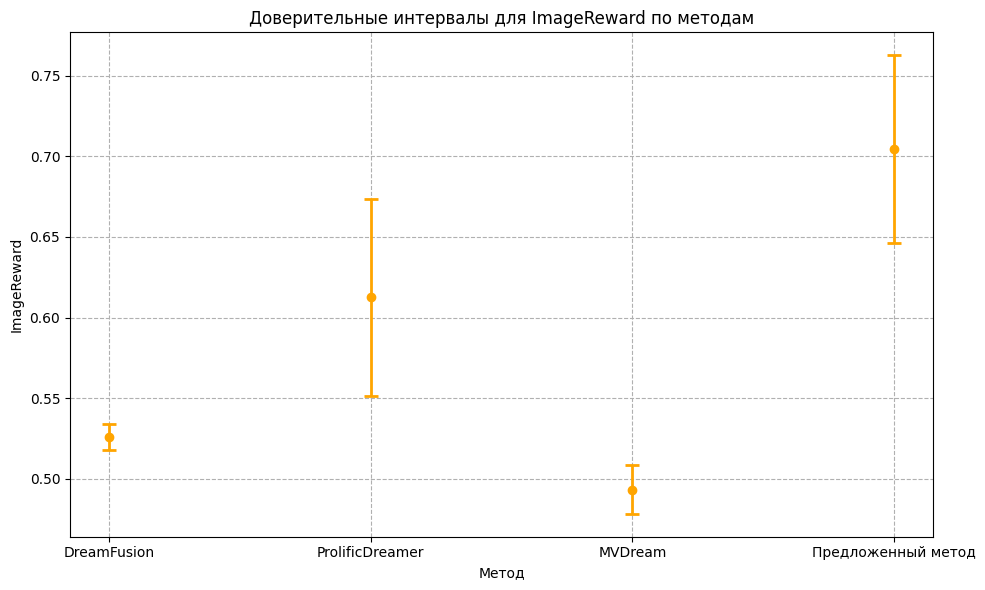

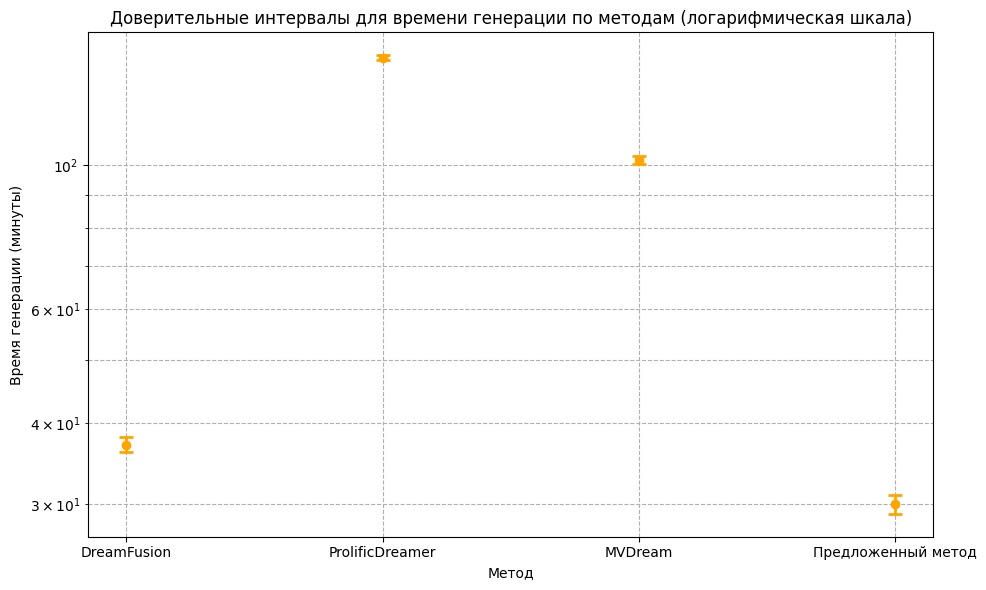

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats


def confidence_interval(mean, std, n, confidence=0.95):
    h = std * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean - h, mean + h


# Creating the dataframe from the provided data
data = {
    "Method": ["DreamFusion", "ProlificDreamer", "MVDream", "Proposed Method"],
    "ImageReward_mean": [0.5257, 0.6126, 0.4932, 0.7045],
    "ImageReward_std": [0.008, 0.061, 0.015, 0.0583],
    "Time_mean": ["00:37:05", "02:26:36", "01:42:02", "00:30:00"],
    "Time_std": ["00:00:59", "00:01:17", "00:01:29", "00:01:00"],
}
df = pd.DataFrame(data)

# Converting time to seconds
def time_to_seconds(t):
    h, m, s = map(int, t.split(':'))
    return h * 3600 + m * 60 + s

def time_to_minutes(t):
    h, m, s = map(int, t.split(':'))
    return (h * 3600 + m * 60 + s) / 60

df["Time_mean"] = df["Time_mean"].apply(time_to_minutes)
df["Time_std"] = df["Time_std"].apply(time_to_minutes)

n = 30
# df["CI_low"] = [confidence_interval(mean, std, n)[0] for mean, std in zip(df["ImageReward_mean"], df["ImageReward_std"])]
# df["CI_high"] = [confidence_interval(mean, std, n)[1] for mean, std in zip(df["ImageReward_mean"], df["ImageReward_std"])]
df["ImageReward_CI_low"] = df["ImageReward_mean"] - df["ImageReward_std"]
df["ImageReward_CI_high"] = df["ImageReward_mean"] + df["ImageReward_std"]
df["Time_CI_low"] = df["Time_mean"] - df["Time_std"]
df["Time_CI_high"] = df["Time_mean"] + df["Time_std"]


# Extracting data for plotting
methods = df["Method"].values
means = df["ImageReward_mean"].values
ci_lows = df["ImageReward_CI_low"].values
ci_highs = df["ImageReward_CI_high"].values

# Quality (ImageReward)
plt.figure(figsize=(10, 6))
plt.errorbar(methods, means, yerr=[means - ci_lows, ci_highs - means], fmt='o', capsize=5, capthick=2, elinewidth=2, color="orange")
plt.title('Доверительные интервалы для ImageReward по методам')
plt.xlabel('Метод')
plt.ylabel('ImageReward')
plt.grid(True, linestyle='--')
plt.xticks(range(len(methods)), ["DreamFusion", "ProlificDreamer", "MVDream", "Предложенный метод"])
plt.tight_layout()
plt.show()


# Speed (Time)
means = df["Time_mean"].values
ci_lows = df["Time_CI_low"].values
ci_highs = df["Time_CI_high"].values

plt.figure(figsize=(10, 6))
# Generation Time with Log Scale
plt.errorbar(methods, means, yerr=[means - ci_lows, ci_highs - means], fmt='o', capsize=5, capthick=2, elinewidth=2, color="orange")
plt.title('Доверительные интервалы для времени генерации по методам (логарифмическая шкала)')
plt.xlabel('Метод')
plt.ylabel('Время генерации (минуты)')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.xticks(range(len(methods)), ["DreamFusion", "ProlificDreamer", "MVDream", "Предложенный метод"])
plt.tight_layout()
plt.show()